In [255]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Para visualización de datos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para cargar los datos
# -----------------------------------------------------------------------
import pickle

# Para sistemas de recomendacion basados en cotenido
# -----------------------------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer # Vectorizacion / tokenizacion 
from sklearn.metrics.pairwise import cosine_similarity #  Cosine Similarity post Vectorizacion

# Importamos nuestras funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../")
import src.soporte_sistemas_recomendacion as sr

# Configuración de pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

In [256]:
df = pd.read_pickle("../datos/02_tabla_para_sist_recomendacion.pkl")
df.sample()

,Tipo,Titulo,Año,Mes,Id,generos,titulo,cali_imdb,direc_imbd,guion_imbd,argum_imbd,durac_imbd
872,Short,A nap...,2023,5,tt27826966,Horror,A nap...,NaN,Ihar Yakimau,Ihar Yakimau,Desconocido,Desconocido


In [257]:
df.shape

(1453, 12)

# Reducir DF
- Me quedo con columnas estrictamente necesarias

In [258]:
df = df[["titulo", "generos", "argum_imbd","cali_imdb"]]

In [259]:
df["cali_imdb"].unique()

array([7.7, 5.2, 6.6, 5.3, nan, 5.9, 5. , 6.3, 6.7, 4.2, 5.1, 4.4, 3.7,
       6.4, 4.9, 5.8, 6. , 6.8, 4.1, 4. , 5.4, 8.4, 6.2, 7.4, 5.6, 3.2,
       2.8, 7.1, 8.3, 2.9, 7.8, 7.2, 7.3, 7.5, 6.1, 5.7, 4.7, 4.3, 2.4,
       4.5, 7.9, 6.5, 8.7, 7. , 4.6, 5.5, 6.9, 9. , 7.6, 8.1, 4.8, 3.3,
       3. , 8. , 2.6, 8.2, 3.8, 3.5, 3.6, 3.4, 3.9, 2.3, 2.7, 8.5, 9.8,
       1.9, 2.5, 8.9, 9.1, 8.6, 1.3, 9.5, 9.3, 3.1, 2. , 8.8, 9.6, 1.7,
       2.1, 9.2, 9.4, 2.2])

In [260]:
df.isnull().sum()

titulo          0
generos         0
argum_imbd      0
cali_imdb     492
dtype: int64

### Elimino todos aquellos que son nulos
- No podemos trabajar con ellos

In [261]:
df.dropna(inplace=True)
df.isnull().sum()

titulo        0
generos       0
argum_imbd    0
cali_imdb     0
dtype: int64

In [262]:
df.shape

(961, 4)

### Quitamos los argumentos donde pone "Desconocido"
- No nos ayuda en nada

In [263]:
df = df[df["argum_imbd"]!= "Desconocido"]

In [264]:
documento = df["argum_imbd"]
vectorize = CountVectorizer()
X = vectorize.fit_transform(documento)

In [265]:
print(vectorize.get_feature_names_out())
print(X.toarray())

['11th' '12' '13' ... 'él' 'última' 'último']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [266]:
print(vectorize.get_feature_names_out())
for k,v in dict(zip(documento,X.toarray())).items():
    print(f"{v} -> {k}")
    break

['11th' '12' '13' ... 'él' 'última' 'último']
[0 0 0 ... 0 0 0] -> Baasha, a gangster, controls a whole village with an iron fist. Pazhanisamy, who relocates to the village, questions the riots and earns Baasha's enmity. Can he defeat Baasha and save the people?


In [267]:
similarity = cosine_similarity(X)
similarity[:20]

array([[1.        , 0.44691988, 0.04721922, ..., 0.29040116, 0.37844749,
        0.0180129 ],
       [0.44691988, 1.        , 0.05247284, ..., 0.49482394, 0.6758898 ,
        0.        ],
       [0.04721922, 0.05247284, 1.        , ..., 0.06307757, 0.04403677,
        0.        ],
       ...,
       [0.18581403, 0.28678854, 0.15695699, ..., 0.31257183, 0.24389058,
        0.01710714],
       [0.20241023, 0.38559504, 0.06280743, ..., 0.33476703, 0.30562492,
        0.        ],
       [0.05572782, 0.09289217, 0.        , ..., 0.19851667, 0.10394384,
        0.04617571]], shape=(20, 477))

### Renombramos titulo a title
- Nuestra funcion espera "title"

In [268]:
df.reset_index(inplace=True)

In [269]:
df = df.rename(columns={"titulo":"title"})

In [270]:
# definimos la película
peli_usuario = df["title"].sample().values[0]

# buscamos el indice de la película
game_index = sr.get_index_from_title(peli_usuario, df)

# sacamos las películas similares
similar_games = list(enumerate(similarity[game_index]))
similar_games[:3]

[(0, np.float64(0.1824501122999404)),
 (1, np.float64(0.31860644549992073)),
 (2, np.float64(0.08492077756084468))]

In [271]:
# ordenamos los resultados
pelis_similares_ordenadas = sorted(similar_games,key=lambda x:x[1],reverse=True)[1:21] # [1:21] si lo cambiamos a [0:21] la tenemos a ella misma 
pelis_similares_ordenadas[:3]

[(362, np.float64(0.48021863745489524)),
 (168, np.float64(0.41947253450876515)),
 (34, np.float64(0.3991140631426436))]

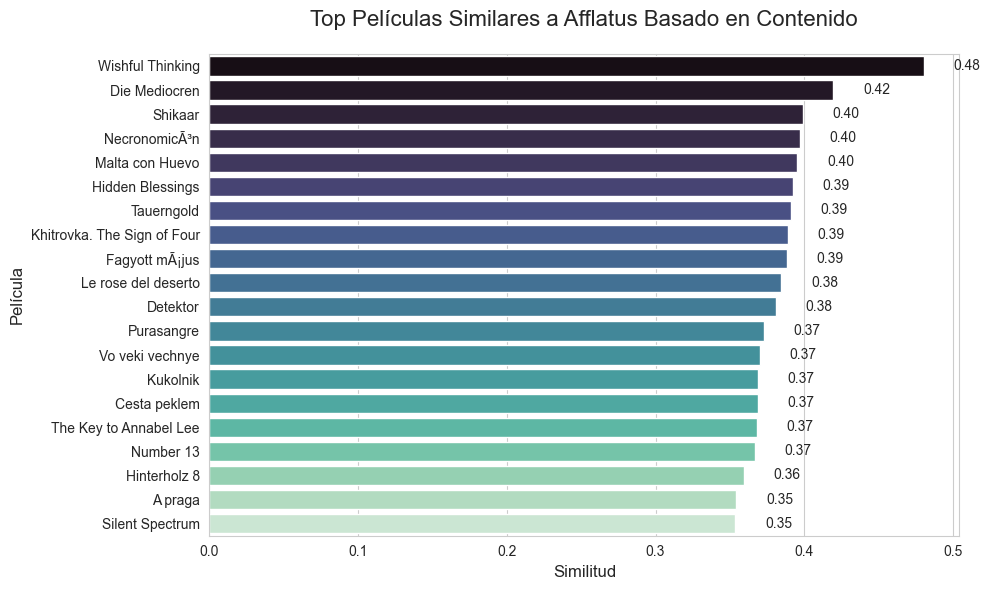

In [272]:
# y ahora buscamos la película
top_similar_films = {}
for i in pelis_similares_ordenadas:
    top_similar_films[sr.get_title_from_index(i[0], df)] = i[1]

# visualizamos los resultados
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Crear gráfico de barras
sns.barplot(
    x=list(top_similar_films.values()), 
    y=list(top_similar_films.keys()), 
    hue = list(top_similar_films.keys()),
    palette="mako"
)

# Añadir etiquetas y título
plt.title(f"Top Películas Similares a {peli_usuario} Basado en Contenido", fontsize=16, pad=20)
plt.xlabel("Similitud", fontsize=12)
plt.ylabel("Película", fontsize=12)

# Añadir valores al final de cada barra
for i, value in enumerate(top_similar_films.values()):
    plt.text(value + 0.02, i, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout()
